参考资料

http://blog.csdn.net/programmer_wei/article/details/52072939

http://ml.apachecn.org/mlia/logistic-regress/#_1

http://blog.jobbole.com/88521/

https://www.cnblogs.com/fionacai/p/5865480.html

## 逻辑斯谛回归(logistic regression LR)

### 概述

逻辑斯谛回归是一种易于实现且性能优异的二分类线性模型.注意这是一个分类模型不是回归模型,
其主要思想是根据现有数据对分类边界线建立回归公式,以此进行分类.这个模型有很多优点,
它是直接对分类可能性进行建模,无需事先假设数据分布,这样就避免了假设分布不准确所带来
的问题.它不仅预测出类别,而且得到近似概率,这对许多需要利用概率辅助决策的任务很有用.


### 优缺点

优点:
一是逻辑回归的算法已经比较成熟，预测较为准确；二是模型求出的系数易于理解，便于解释，不属于黑盒模型，尤其在银行业，80%的预测是使用逻辑回归；三是结果是概率值，可以做ranking model；四是训练快。

缺点:分类较多的y都不是很适用；对于自变量的多重共线性比较敏感，所以需要利用因子分析或聚类分析来选择代表性的自变量；另外预测结果呈现S型，两端概率变化小，中间概率变化大比较敏感，导致很多区间的变量的变化对目标概率的影响没有区分度，无法确定阈值。

### 应用场景

逻辑斯谛回归广泛应用于工业界和学术界.可用于做二分类问题,虽然是线性分类器,但是只要
做好特征工程,特征处理就可以很好的处理非线性问题,如可以利用GBDT+LR的组合模型,GBDT
做特征选择每条路径就是一个组合特征,再把特征放到LR中训练.CTR预估等等应用场景

### 公式及推理

sigmoid函数

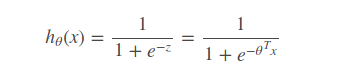

In [9]:
from IPython.core.display import Image, display
display(Image(filename='images/sigmoid.png'))

Sigmoid 函数的输入记为 z ，由下面公式得到,也可以使用向量的方式表示:

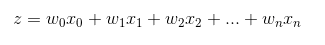

In [8]:
display(Image(filename='images/sigmoid_z1.png'))
display(Image(filename='images/sigmoid_z2.png'))

画出sigmoid图像更直观,如图是一个变量取值在[-7,7]的sigmoid图像

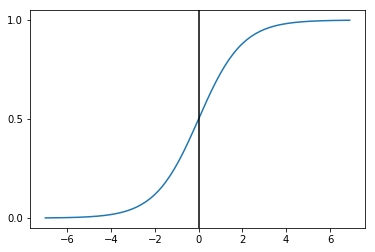

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.yticks([0.0,0.5,1.0])
plt.show()

从图中可以看出x的输入可以是负无穷到正无穷，而输出y总是[0,1]，并且当x=0时，y的值为0.5，以一种概率的形式表示. x=0的时候y=0.5 这是决策边界.当大于05时就是正类,小于0.5时就是负类.

为了直观上对逻辑回归有更好的理解，我们可以和Adaline模型联系起来，二者的唯一区别是：Adaline模型，激活函数，在逻辑回归中，激活函数变成了sigmoid函数。


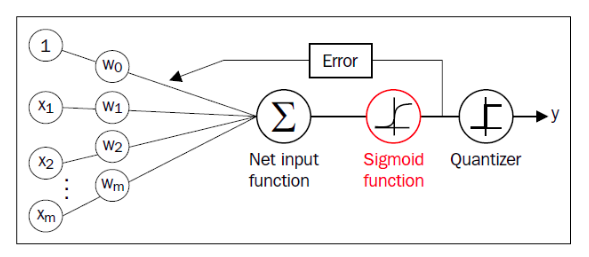

In [12]:
display(Image(filename='images/adaline.png'))

由于sigmoid函数的输出是在[0,1]，所以可以赋予物理含义：样本属于正例的概率，。举例来说，如果，意味着此样本是Iris-Versicolor花的概率是0.8，是Iris-Setosa花的概率是
0.2.

有了样本的预测概率，再得到样本的类别值就很简单了,和Adaline一样，使用单位阶跃函数：

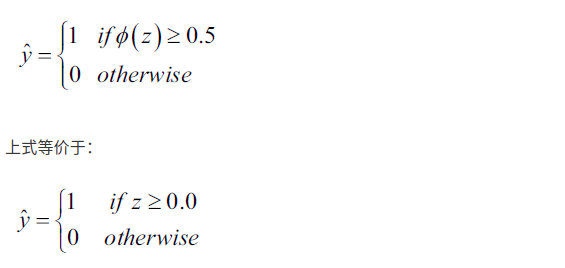

In [13]:
display(Image(filename='images/stepfunction.png'))

逻辑回归之所以应用广泛，一大优点就是它不但能预测类别，还能输出具体的概率值，概率值很很多场景往往比单纯的类别值重要的多。比如在天气预测中下雨的可能性，病人患病的可能性等等。

### 极大似然估计

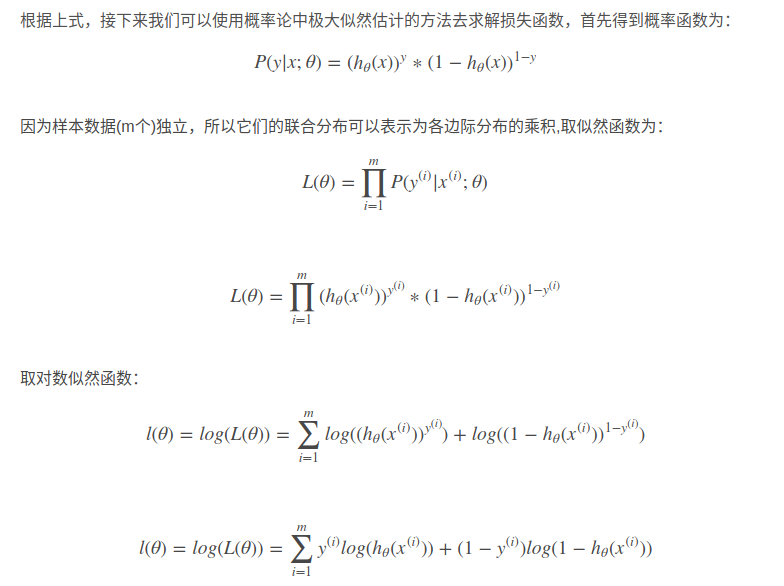

In [10]:
display(Image(filename='images/maxlikelihood.png'))

可以使用梯度下降法优化该对数似然函数

### 梯度下降

使用梯度下降算法更新权重参数时,用到的算式都是一样的

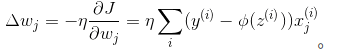

In [47]:
display(Image(filename='images/gradientdescent1.png'))

首先计算log-likelihood函数对权重参数的偏导数:

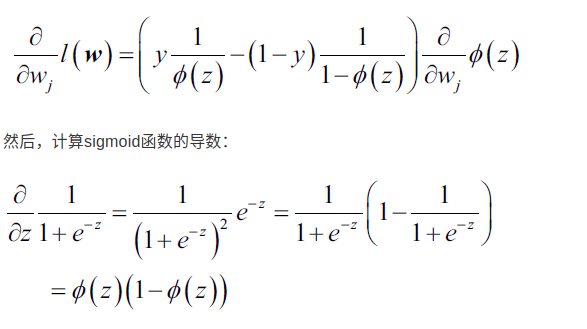

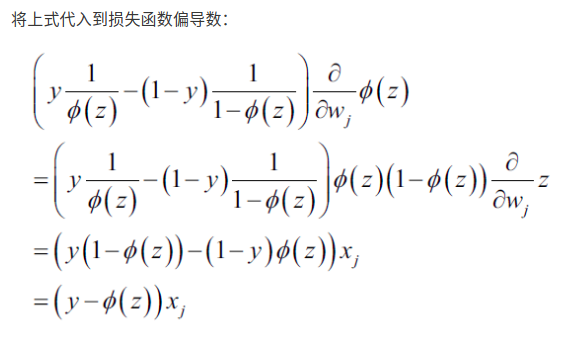

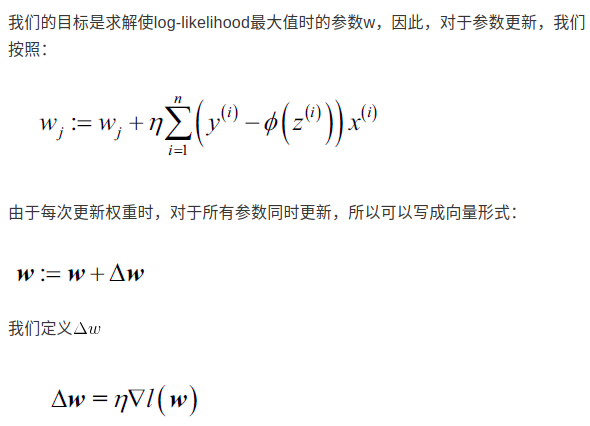

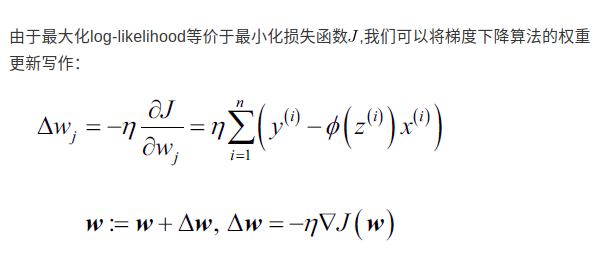

In [48]:
display(Image(filename='images/gradientdescent2.png'))
display(Image(filename='images/gradientdescent3.png'))
display(Image(filename='images/gradientdescent4.png'))
display(Image(filename='images/gradientdescent5.png'))

### 正则化

正则化是解决特征共线性,过滤数据中的噪音和防止过拟合常用的方法,正则化背后的原理是引入
额外的信息(偏差)来惩罚过大的权重参数.最常见的形式就是加入L1和L2,L2的公式如下:

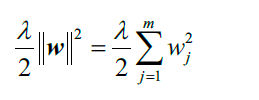

In [50]:
display(Image(filename='images/L2regularization1.png'))

如何应用正则化呢？我们只需要在现有损失函数基础上添加正则项即可，比如对于逻辑回归模型，带有L2正则项的的损失函数：

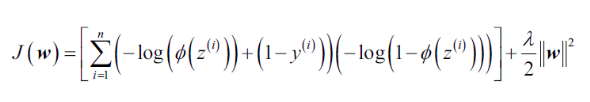

In [51]:
display(Image(filename='images/L2regularization2.png'))

通过正则系数,我们可以控制在训练过程中使得参数比较小。值越大，正则化威力越强大。

在sklearn的LogisticRegression里面就有一个超参数C,表示为

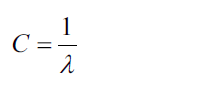

In [52]:
display(Image(filename='images/L2regularization3.png'))

所以，我们可以将逻辑回归 正则化的损失函数重写为

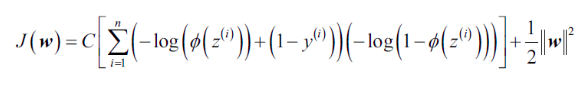

In [53]:
display(Image(filename='images/L2regularization4.png'))

如果我们减小C的值，也就是增大正则系数的值，正则化项的威力也增强。

### 实例

导入数据集

In [19]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()

分割训练集和测试集

In [20]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.data,iris.target,test_size=0.3,random_state=0)

In [23]:
X_train[0:5]

array([[ 5. ,  2. ,  3.5,  1. ],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 6.7,  2.5,  5.8,  1.8]])

做下标准归一化

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [25]:
X_train_std[0:5]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938]])

使用sklearn训练逻辑斯谛回归模型,在多分类的情况下,使用one-vs-rest

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0,random_state=0)

In [28]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

预测第一个样本输入那个类别的概率

In [38]:
lr.predict_proba(X_test_std[0:1,:])

array([[  1.77078231e-09,   9.18586029e-02,   9.08141395e-01]])

In [39]:
y_pred=lr.predict(X_test_std)

In [41]:
print("预测错误的数量:%d"%(y_test!=y_pred).sum())

预测错误的数量:1


打印混淆矩阵可以更直观看到预测结果

In [42]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])